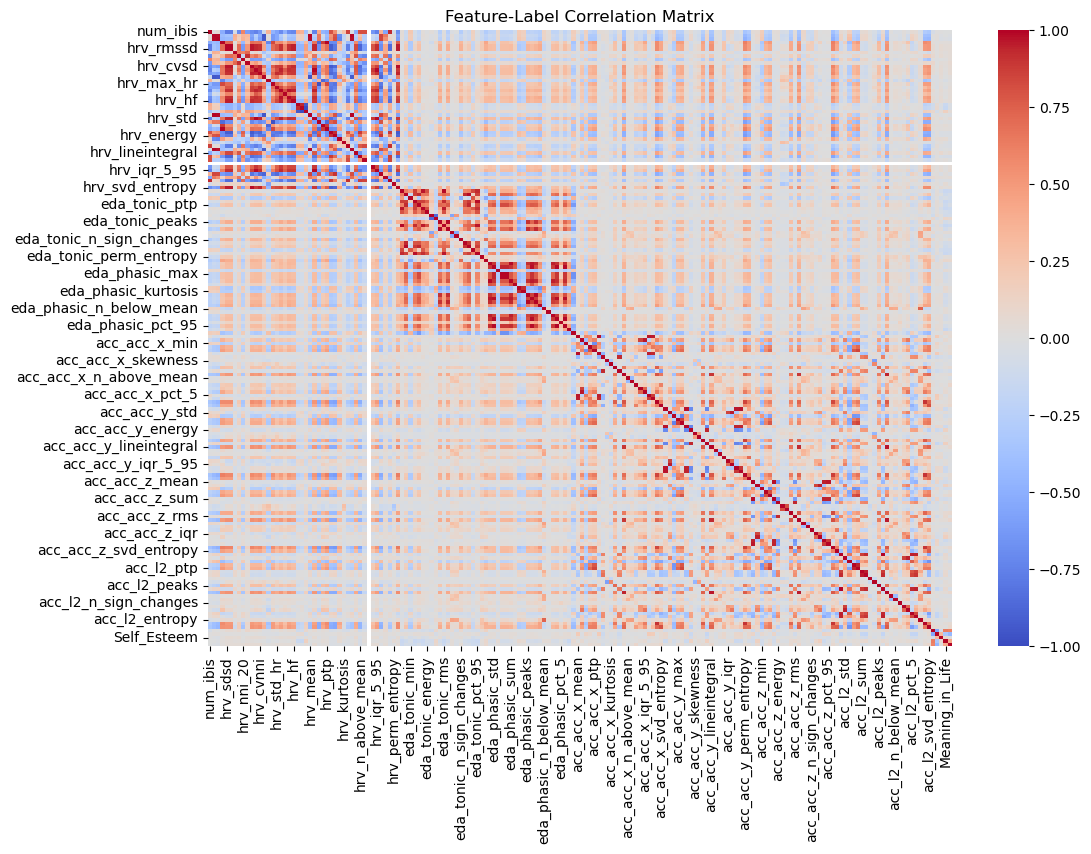

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load one fold of data for feature analysis
with open("train_2d_fold1.pkl", "rb") as f:
    train_dict = pickle.load(f)

# Extract column names
columns = train_dict["columns"]
label_columns = ["Positive_Emotions", "Negative_Emotions", "Self_Esteem", "Meaning_in_Life", "Social_Support"]

# Get feature indices (exclude labels and participant_id)
feature_indices = [i for i in range(len(columns)) if columns[i] not in label_columns and columns[i] != "participant_id"]

# Extract features and labels
X_raw = [np.array(seq[:, feature_indices], dtype=np.float32) for seq in train_dict["data"]]
y_raw = [np.array(seq[:, [columns.index(col) for col in label_columns]], dtype=np.float32) for seq in train_dict["data"]]

# Convert to pandas DataFrame
X_flat = np.vstack(X_raw)
y_flat = np.vstack(y_raw)
feature_names = [columns[i] for i in feature_indices]

df_features = pd.DataFrame(X_flat, columns=feature_names)
df_labels = pd.DataFrame(y_flat, columns=label_columns)

# Combine into one DataFrame
df_full = pd.concat([df_features, df_labels], axis=1)

# Compute correlation matrix
corr_matrix = df_full.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Feature-Label Correlation Matrix")
plt.show()
